In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
ratings=pd.read_csv('./data/ratings.csv',sep=',')
movies=pd.read_csv('./data/movies.csv',sep=',')

### Checking movies dataset

In [ ]:
movies.info()

In [ ]:
movies.head(2)

In [ ]:
movies.shape

In [3]:
dup_movies=movies[movies.duplicated(subset=['title'])]['title'].tolist()
dup_movies

['Emma (1996)',
 'War of the Worlds (2005)',
 'Confessions of a Dangerous Mind (2002)',
 'Eros (2004)',
 'Saturn 3 (1980)']

In [4]:
# checking for duplicates
movies.duplicated(subset='title').value_counts()

False    9737
True        5
dtype: int64

In [5]:
# dropping duplicates 
movies.drop_duplicates(subset ="title", keep = 'first', inplace = True)
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### Checking ratings dataset

In [ ]:
ratings.info()

In [ ]:
ratings.head(2)

In [ ]:
ratings.shape

In [ ]:
ratings['movieId'].nunique()

In [6]:
ratings['unique_id'] = ratings['movieId'] 
movies['unique_id'] = movies['movieId']

In [7]:
ratings['unique_id'].nunique(), movies['unique_id'].nunique()

(9724, 9737)

In [8]:
mov_rat=ratings.merge(movies, on=['unique_id'])

# check for number of unique ids
mov_rat['unique_id'].nunique()

9719

In [9]:
mov_rat

,userId,movieId_x,rating,timestamp,unique_id,movieId_y,title,genres
0,1,1,4.0,964982703,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...,...,...
100825,610,160341,2.5,1479545749,160341,160341,Bloodmoon (1997),Action|Thriller
100826,610,160527,4.5,1479544998,160527,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
100827,610,160836,3.0,1493844794,160836,160836,Hazard (2005),Action|Drama|Thriller
100828,610,163937,3.5,1493848789,163937,163937,Blair Witch (2016),Horror|Thriller


In [ ]:
clean_title(ratings)
ratings

In [13]:
unique_movies = mov_rat['title'].unique()
len(unique_movies)

9719

In [14]:
movies_dict = {unique_movies[i] : i for i in range(len(unique_movies))}
print(movies_dict)
print(len(movies_dict))

{'Toy Story (1995)': 0, 'Grumpier Old Men (1995)': 1, 'Heat (1995)': 2, 'Seven (a.k.a. Se7en) (1995)': 3, 'Usual Suspects, The (1995)': 4, 'From Dusk Till Dawn (1996)': 5, 'Bottle Rocket (1996)': 6, 'Braveheart (1995)': 7, 'Rob Roy (1995)': 8, 'Canadian Bacon (1995)': 9, 'Desperado (1995)': 10, 'Billy Madison (1995)': 11, 'Clerks (1994)': 12, 'Dumb & Dumber (Dumb and Dumber) (1994)': 13, 'Ed Wood (1994)': 14, 'Star Wars: Episode IV - A New Hope (1977)': 15, 'Pulp Fiction (1994)': 16, 'Stargate (1994)': 17, 'Tommy Boy (1995)': 18, 'Clear and Present Danger (1994)': 19, 'Forrest Gump (1994)': 20, 'Jungle Book, The (1994)': 21, 'Mask, The (1994)': 22, 'Blown Away (1994)': 23, 'Dazed and Confused (1993)': 24, 'Fugitive, The (1993)': 25, 'Jurassic Park (1993)': 26, 'Mrs. Doubtfire (1993)': 27, "Schindler's List (1993)": 28, 'So I Married an Axe Murderer (1993)': 29, 'Three Musketeers, The (1993)': 30, 'Tombstone (1993)': 31, 'Dances with Wolves (1990)': 32, 'Batman (1989)': 33, 'Silence of 

### Merging datasets

In [15]:
df = pd.merge(movies, ratings, on='movieId', how='right')
df

,movieId,title,genres,unique_id_x,userId,rating,timestamp,unique_id_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1,4.0,964982703,1
1,3,Grumpier Old Men (1995),Comedy|Romance,3.0,1,4.0,964981247,3
2,6,Heat (1995),Action|Crime|Thriller,6.0,1,4.0,964982224,6
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,47.0,1,5.0,964983815,47
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,50.0,1,5.0,964982931,50
...,...,...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,166534.0,610,4.0,1493848402,166534
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,168248.0,610,5.0,1493850091,168248
100833,168250,Get Out (2017),Horror,168250.0,610,5.0,1494273047,168250
100834,168252,Logan (2017),Action|Sci-Fi,168252.0,610,5.0,1493846352,168252


In [ ]:
# check for number of movie ids
df['movieId'].nunique()

In [ ]:
# drop 
df['title'].isnull().values.any()

In [ ]:
# checking the missing values
df['title'].isnull().sum()

In [16]:
df['genres']=df['genres'].astype(str)

In [17]:
# splitting 'genres' strings into lists
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df['genres']

0         [Adventure, Animation, Children, Comedy, Fantasy]
1                                         [Comedy, Romance]
2                                 [Action, Crime, Thriller]
3                                       [Mystery, Thriller]
4                                [Crime, Mystery, Thriller]
                                ...                        
100831                            [Drama, Horror, Thriller]
100832                            [Action, Crime, Thriller]
100833                                             [Horror]
100834                                     [Action, Sci-Fi]
100835                     [Action, Crime, Drama, Thriller]
Name: genres, Length: 100836, dtype: object

In [19]:
df.columns

Index(['movieId', 'title', 'genres', 'unique_id_x', 'userId', 'rating',
       'timestamp', 'unique_id_y'],
      dtype='object')

In [ ]:
#import datetime
#df['timestamp']=df['timestamp'].astype(str)
#df['timestamp'] = pd.to_datetime(df['timestamp'])

In [20]:
df.drop(columns=['movieId', 'genres', 'timestamp','unique_id_x','unique_id_y'], inplace=True)
df

,title,userId,rating
0,Toy Story (1995),1,4.0
1,Grumpier Old Men (1995),1,4.0
2,Heat (1995),1,4.0
3,Seven (a.k.a. Se7en) (1995),1,5.0
4,"Usual Suspects, The (1995)",1,5.0
...,...,...,...
100831,Split (2017),610,4.0
100832,John Wick: Chapter Two (2017),610,5.0
100833,Get Out (2017),610,5.0
100834,Logan (2017),610,5.0


In [21]:
# save the df
#df.to_csv('3cols_df.csv')

In [29]:
ratings = df.pivot_table(index='userId',columns='title', values='rating')
ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [30]:
ratings.mean().sort_values(ascending=False)

title
Tom Segura: Mostly Stories (2016)                                                    5.0
Winter in Prostokvashino (1984)                                                      5.0
The Adventures of Sherlock Holmes and Doctor Watson: The Treasures of Agra (1983)    5.0
The Adventures of Sherlock Holmes and Dr. Watson: Bloody Signature (1979)            5.0
When Worlds Collide (1951)                                                           5.0
                                                                                    ... 
Don't Look Now (1973)                                                                0.5
Journey 2: The Mysterious Island (2012)                                              0.5
Joe Dirt 2: Beautiful Loser (2015)                                                   0.5
Jesus Christ Vampire Hunter (2001)                                                   0.5
Fullmetal Alchemist 2018 (2017)                                                      0.5
Length: 9719, d

In [31]:
ratings.count(axis=1).sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Length: 610, dtype: int64

In [27]:
films = list(ratings.columns)

["'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...All the Marbles (1981)',
 '...And Justice for All (1979)',
 '00 Schneider - Jagd auf Nihil Baxter (1994)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Cent Pistol (2015)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Streets (2016)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 "101 Dalmatians II: Patch's London Adventure (2003)",
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th & Wolf (2006)',
 '10th Kingdom, The (2000)',
 '10th Victim, The (La decima vittima) (1965)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2

In [37]:
# cleaning the titles
def clean_title(df):
    cols = df.columns
    new_columns = []
    for col in cols:
        new = col.lstrip().rstrip().replace ("'", "")
        new_columns.append(new)  
        
    df.columns = new_columns

In [38]:
clean_title(ratings)
ratings

,71 (2014),Hellboy: The Seeds of Creation (2004),Round Midnight (1986),Salems Lot (2004),Til There Was You (1997),Tis the Season for Love (2015),"burbs, The (1989)",night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,4.000000,3.262378
2,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
3,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
4,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
5,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
607,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
608,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,4.500000,3.500000,3.262378,3.262378,3.262378


### Missing values

In [32]:
# filling the missing data with mean value
def fill_nan(df):
    mean_values = df.mean().mean()
    df.fillna(mean_values,inplace=True)
    return df

In [33]:
ratings = fill_nan(ratings)
ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,4.000000,3.262378
2,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
3,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
4,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
5,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
607,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378
608,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,3.262378,...,3.262378,3.262378,3.262378,3.262378,3.262378,4.500000,3.500000,3.262378,3.262378,3.262378


### Create a movie-genre matrix

In [39]:
# instantiate NMF model
n_components=20
nmf_model = NMF(n_components=n_components)

In [40]:
nmf_model.fit(ratings)

NMF(n_components=20)

In [41]:
Q=nmf_model.components_

In [42]:
Q = pd.DataFrame(Q, columns=films, 
                 index=[f"feature_{i+1}" for i in range(n_components)])
Q.head(2)

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
feature_1,2.600044,0.394708,0.398936,0.404222,0.402158,0.199937,2.463845,0.373283,2.274822,0.296047,...,0.331007,0.088200,2.57596,0.392375,0.384726,0.075660,0.026479,0.248623,2.510917,0.339657
feature_2,16.095439,30.555460,30.711975,30.453471,30.609081,34.784508,12.093473,30.429035,0.000000,30.748850,...,36.980515,14.594457,17.87154,21.684090,30.613286,25.537722,38.924494,28.141009,9.354007,26.497643


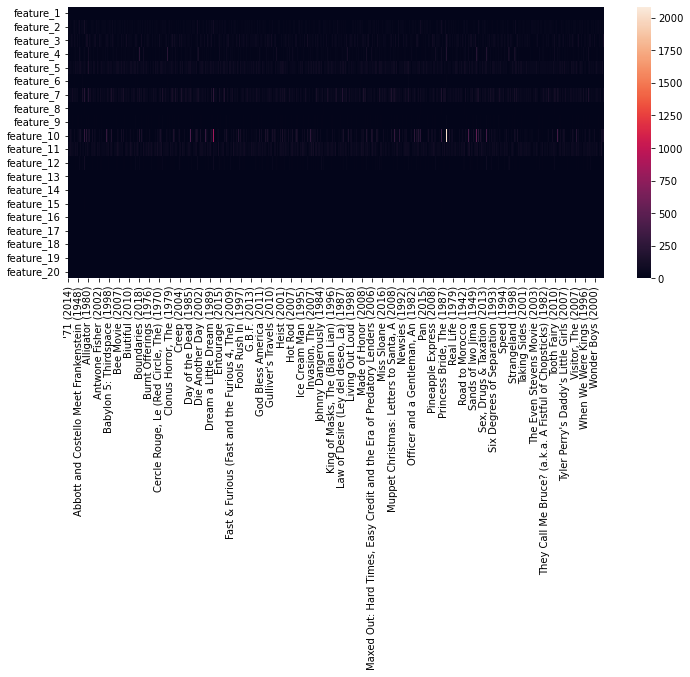

In [43]:
plt.figure(figsize=(12, 5))
sns.heatmap(Q, annot=False);

In [44]:
P = pd.DataFrame(nmf_model.transform(ratings),
                 index=ratings.index,
                 columns=[f"feature_{i+1}" for i in range(n_components)])

P.head(2)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
userId,,,,,,,,,,,,,,,,,,,,
1,0.218113,0.006437,0.005534,0.000000,0.000707,0.000399,0.000941,0.015288,0.001819,0.000566,0.000744,0.002298,0.219829,0.253158,0.110557,0.572281,0.114752,0.324686,0.076721,0.0
2,0.260318,0.005133,0.006874,0.000349,0.000251,0.000000,0.000000,0.024731,0.000421,0.000000,0.000000,0.000000,0.254650,0.302237,0.125721,0.602792,0.090569,0.319305,0.018993,0.0


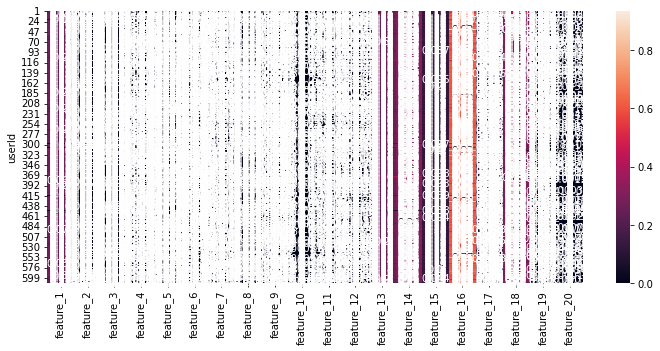

In [45]:
plt.figure(figsize=(12, 5))
sns.heatmap(P, annot=True);

In [46]:
R_hat = np.dot(P,Q).round(1)
R_hat=pd.DataFrame(R_hat, columns=ratings.columns, index=ratings.index)

R_hat.head(2)

,71 (2014),Hellboy: The Seeds of Creation (2004),Round Midnight (1986),Salems Lot (2004),Til There Was You (1997),Tis the Season for Love (2015),"burbs, The (1989)",night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.2,3.3,...,3.2,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.4,3.2
2,3.3,3.3,3.3,3.3,3.3,3.2,3.2,3.3,3.3,3.3,...,3.3,3.3,3.3,3.3,3.3,3.2,3.3,3.3,3.4,3.3


In [47]:
abs(ratings - R_hat)

,71 (2014),Hellboy: The Seeds of Creation (2004),Round Midnight (1986),Salems Lot (2004),Til There Was You (1997),Tis the Season for Love (2015),"burbs, The (1989)",night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.037622,...,0.062378,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.600000,0.062378
2,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.062378,0.037622,0.037622,0.037622,...,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.037622,0.037622,0.137622,0.037622
3,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.062378,0.037622,0.062378,0.037622,...,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.037622,0.037622,0.037622,0.037622
4,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.037622,0.062378,0.037622,...,0.062378,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.137622,0.037622
5,0.062378,0.037622,0.037622,0.037622,0.037622,0.062378,0.062378,0.062378,0.062378,0.037622,...,0.037622,0.037622,0.062378,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.037622,0.062378,0.062378,0.062378,0.062378,0.062378,0.262378,0.062378,0.137622,0.062378,...,0.062378,0.137622,0.062378,0.037622,0.062378,0.337622,0.037622,0.037622,0.062378,0.062378
607,0.062378,0.037622,0.037622,0.037622,0.037622,0.037622,0.062378,0.037622,0.062378,0.037622,...,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.037622,0.137622,0.037622
608,0.062378,0.062378,0.062378,0.062378,0.062378,0.062378,0.462378,0.062378,0.037622,0.062378,...,0.062378,0.037622,0.062378,0.037622,0.062378,0.900000,0.300000,0.062378,0.162378,0.037622


In [48]:
nmf_model.reconstruction_err_

293.9977061315241

In [ ]:
pickle.dump(nmf_model,open('nmf_model.sav', "wb"))

### Check

In [49]:
new_r = np.dot(P,Q)
pd.DataFrame(new_r.round(1), columns=ratings.columns, index=ratings.index)

,71 (2014),Hellboy: The Seeds of Creation (2004),Round Midnight (1986),Salems Lot (2004),Til There Was You (1997),Tis the Season for Love (2015),"burbs, The (1989)",night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.2,3.3,...,3.2,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.4,3.2
2,3.3,3.3,3.3,3.3,3.3,3.2,3.2,3.3,3.3,3.3,...,3.3,3.3,3.3,3.3,3.3,3.2,3.3,3.3,3.4,3.3
3,3.3,3.3,3.3,3.3,3.3,3.2,3.2,3.3,3.2,3.3,...,3.3,3.3,3.3,3.3,3.3,3.2,3.3,3.3,3.3,3.3
4,3.3,3.3,3.3,3.3,3.3,3.3,3.2,3.3,3.2,3.3,...,3.2,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.4,3.3
5,3.2,3.3,3.3,3.3,3.3,3.2,3.2,3.2,3.2,3.3,...,3.3,3.3,3.2,3.3,3.3,3.3,3.3,3.3,3.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.3,3.2,3.2,3.2,3.2,3.2,3.0,3.2,3.4,3.2,...,3.2,3.4,3.2,3.3,3.2,3.6,3.3,3.3,3.2,3.2
607,3.2,3.3,3.3,3.3,3.3,3.3,3.2,3.3,3.2,3.3,...,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.3,3.4,3.3
608,3.2,3.2,3.2,3.2,3.2,3.2,2.8,3.2,3.3,3.2,...,3.2,3.3,3.2,3.3,3.2,3.6,3.2,3.2,3.1,3.3


In [50]:
#New user
import random

#assigning random ratings from a new user
new_ratings=[]
for i in range(1,len(ratings.columns)+1):
    new=round(random.uniform(0, 5), 1)
    new_ratings.append(new)

In [51]:
new_ratings=np.array(new_ratings).reshape(1,9719)

In [52]:
#generate extra a user_P
user_p = nmf_model.transform(new_ratings)

In [53]:
#new user R - reconstruct R but for this new user only
user_r = np.dot(user_p,Q)

In [56]:
#remove films that are already seen
user_r = user_r[0][:50]
user_r

2.5055277659442003

In [62]:
rec = pd.Series(user_r, index=ratings.columns)
rec

71 (2014)                                    2.505528
Hellboy: The Seeds of Creation (2004)        2.505528
Round Midnight (1986)                        2.505528
Salems Lot (2004)                            2.505528
Til There Was You (1997)                     2.505528
                                               ...   
eXistenZ (1999)                              2.505528
xXx (2002)                                   2.505528
xXx: State of the Union (2005)               2.505528
¡Three Amigos! (1986)                        2.505528
À nous la liberté (Freedom for Us) (1931)    2.505528
Length: 9719, dtype: float64

In [64]:
rec.sort_values(ascending=False)

71 (2014)                                    2.505528
Parasyte: Part 2 (2015)                      2.505528
Parent Trap, The (1998)                      2.505528
Parental Guidance (2012)                     2.505528
Parenthood (1989)                            2.505528
                                               ...   
Friendly Persuasion (1956)                   2.505528
Friends & Lovers (1999)                      2.505528
Friends with Benefits (2011)                 2.505528
Friends with Kids (2011)                     2.505528
À nous la liberté (Freedom for Us) (1931)    2.505528
Length: 9719, dtype: float64

### Check2/Function nmf_rec

In [82]:
movie_title_dict={key:value for (value,key) in enumerate(movies_dict)}
movie_title_dict

{'Toy Story (1995)': 0,
 'Grumpier Old Men (1995)': 1,
 'Heat (1995)': 2,
 'Seven (a.k.a. Se7en) (1995)': 3,
 'Usual Suspects, The (1995)': 4,
 'From Dusk Till Dawn (1996)': 5,
 'Bottle Rocket (1996)': 6,
 'Braveheart (1995)': 7,
 'Rob Roy (1995)': 8,
 'Canadian Bacon (1995)': 9,
 'Desperado (1995)': 10,
 'Billy Madison (1995)': 11,
 'Clerks (1994)': 12,
 'Dumb & Dumber (Dumb and Dumber) (1994)': 13,
 'Ed Wood (1994)': 14,
 'Star Wars: Episode IV - A New Hope (1977)': 15,
 'Pulp Fiction (1994)': 16,
 'Stargate (1994)': 17,
 'Tommy Boy (1995)': 18,
 'Clear and Present Danger (1994)': 19,
 'Forrest Gump (1994)': 20,
 'Jungle Book, The (1994)': 21,
 'Mask, The (1994)': 22,
 'Blown Away (1994)': 23,
 'Dazed and Confused (1993)': 24,
 'Fugitive, The (1993)': 25,
 'Jurassic Park (1993)': 26,
 'Mrs. Doubtfire (1993)': 27,
 "Schindler's List (1993)": 28,
 'So I Married an Axe Murderer (1993)': 29,
 'Three Musketeers, The (1993)': 30,
 'Tombstone (1993)': 31,
 'Dances with Wolves (1990)': 32,
 

In [144]:
def recommend_nmf(query, model, k=10):
    """Filters and recommends the top k movies 
    for any given input query based 
    on a trained NMF model.

    Parameters
    ----------
    query : dict
        A dictionary of movies already seen. 
        Takes the form {"movie_A": 3, "movie_B": 3} etc
    nmf_model : pickle
        pickle nmf_model read from disk
    k : int, optional
        no. of top movies to recommend, by default 10
    """
    # 1. candiate generation
    base_rating = [np.nan] * len(movie_titles)
    count = 0
    new_query = {}
    # construct a user vector
    for movie in ratings.columns:

        if movie not in query:
            # fuzzy = process.extractOne(movie, movie_title_dict.keys()) #matches the input
            new_query[movie] = np.nan
            # new_query.append(fuzzy[0])
        else:
            new_query[movie] = query[movie]

    new_query = pd.DataFrame(new_query, index=[0])
    new_query = np.array(new_query).reshape(1, -1)

    #print(new_query)

    user_dataframe = pd.DataFrame(new_query, index=[
                                  'Recommendation'], columns=ratings.columns).fillna(ratings.mean())
    #print(user_dataframe)

    # 2. scoring

    # calculate the score with the NMF nmf_model
    model = pickle.load(open("nmf_model.sav", "rb"))
    # calculate the score with the NMF model
    user_P = model.transform(user_dataframe)
    Q = model.components_
    user_R = np.dot(user_P, Q)

    user_dataframe = pd.DataFrame(
        user_R, index=['Recommendation'], columns=ratings.columns)

    # 3. ranking

    # set zero score to movies already seen by the user
    unrated_boolean = np.isnan(new_query)[0]
    unrated_df = user_dataframe.iloc[:, unrated_boolean]
    sorted_new_user_df = unrated_df.T.sort_values(
        by='Recommendation', ascending=False).head(k)

    return sorted_new_user_df.head(k)

In [122]:
recommend_nmf(query,'nmf_model.sav',k=10)

,Recommendation
Star Wars: Episode V - The Empire Strikes Back (1980),0.509761
"Matrix, The (1999)",0.480403
Braveheart (1995),0.449613
Reservoir Dogs (1992),0.425721
Aliens (1986),0.424491
Terminator 2: Judgment Day (1991),0.420319
Saving Private Ryan (1998),0.419106
"Princess Bride, The (1987)",0.415396
"Usual Suspects, The (1995)",0.391554
"Godfather, The (1972)",0.379151
